In [1]:
import os
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
DATADIR = os.path.join(os.path.expanduser('~'),'Downloads','Homework 3 Resources')
print(os.path.exists(DATADIR))
from numpy import random as rnd
import math
from sklearn.linear_model import LogisticRegression

True


In [2]:
fFeatures = os.path.join(DATADIR, 'X-Classification.txt')
fLabels = os.path.join(DATADIR, 'y-Classification.txt')
os.path.exists(fLabels)

import pandas as pd
X = pd.read_csv(fFeatures,header=None)
X_array = np.array(X)
np.shape(X_array)


X1 = np.array(X)[:,[0]]
X2 = np.array(X)[:,[1]]

y = pd.read_csv(fLabels,header=None)
y = np.array(y)[:,[0]]

X_b = np.c_[np.ones((len(X_array),1)),X_array]


In [3]:
#classify feature1 and feature2 values by labels
class0_indices = []
class1_indices = []
counter = 0
for _ in list(y):
    counter += 1
    if _[0] == 1.0:
        class1_indices.append(counter-1)
    else:
        class0_indices.append(counter-1)
counter = counter-1


class1 = []
for index in class1_indices:
    class1.append([X1[index][0],X2[index][0]])


class0 = []
for index in class0_indices:
    class0.append([X1[index][0],X2[index][0]])


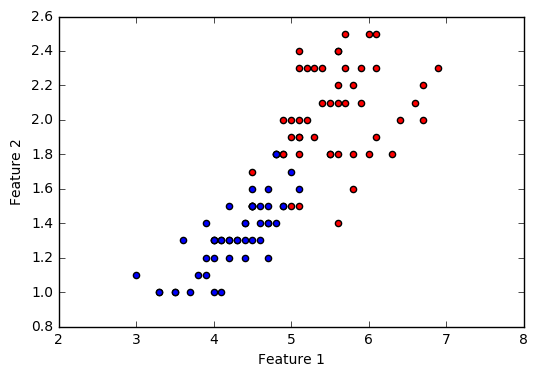

In [4]:
#Provide a scatter plot of the data

class0_feature1 = [instance[0] for instance in class0]
class0_feature2 = [instance[1] for instance in class0]
class1_feature1 = [instance[0] for instance in class1]
class1_feature2 = [instance[1] for instance in class1]

plt.scatter(class0_feature1,class0_feature2,c='r')

plt.scatter(class1_feature1,class1_feature2,c='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [5]:
def logistic_function(theta, X):
    """Inputs theta values (coefficients) 
    and X values (a 3-column vector).
    Outputs a vector of probabilities between 0 and 1"""
    return 1/(1+math.e**(-X.dot(theta))) 

In [6]:
def cost_function(X, y,theta=np.zeros((3,1))):
    """Inputs theta, X, and y
    Outputs a cost, which is a single value
    for the average cost of those specific thetas and all X and y values"""
    m = len(X)
    hyp = logistic_function(theta,X)
    #return (-1/m)*((y.T.dot(np.log(hyp)))+ (1-y).T.dot(np.log(1-hyp)))[0][0]
    #return -np.mean((y*np.log(hyp)) + ((1-y)*(np.log(1-hyp))))#[0]
    return -np.mean((y*np.log(hyp)) + ((1-y)*(np.log(1-hyp))))
cost_function(X_b,y)

0.69314718055994529

In [7]:
def gradient_func(X, y,theta=rnd.rand(3,1)):
    """Finds the gradient, the sum of the first derivative
    of the cost function with respect to EACH theta."""
    m = len(X)
    #return ((logistic_function(theta, X) - y).T.dot(X))
    return ((1/m)*(X.T.dot(logistic_function(theta, X) - y)))
gradient_func(X_b, y)


array([[ 0.47717969],
       [ 2.67590396],
       [ 0.98064485]])

In [9]:
learning_rates = [0.0001, 0.01]
thresholds = [0.01,0.0001,10**-7]

def gradient_descent(X, y, theta=np.zeros((3,1)),eta=learning_rates[1],cost_thresh=thresholds[-1], graph=False):
    model_parameters=[]
    m=len(X1)
    cost = cost_function(X, y)
    #print(cost)
    hyp = logistic_function(theta,X)
    i = 1
    cost_iter=[]
    cost_iter.append(cost)
    change_cost = 1
    #for n in range(60000):
    while (abs(change_cost) >= cost_thresh):
        old_cost = cost
        #print(cost)
        gradients = gradient_func(X,y,theta=theta)
        #print(theta)
        theta = theta - eta*gradients #.T #This T is a guess!!!
        #return theta
        cost = cost_function(X, y, theta=theta)
        #print(cost)

        cost_iter.append(cost)
        change_cost = old_cost - cost

        i += 1
    print('Learning rate:',eta)
    print('Cost threshold:',cost_thresh)
    print('Number of iterations:', i)
    print('Final cost:',cost)
    print('Final change_cost',change_cost)
    if graph == True:
        plt.plot([x for x in range(i)],[y for y in cost_iter])
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()
        return
    else:
        return theta
gradient_descent(X_b,y,graph=False,eta=learning_rates[0],cost_thresh=thresholds[-1])

Learning rate: 0.0001
Cost threshold: 1e-07
Number of iterations: 1205888
Final cost: 0.335903387474
Final change_cost 9.99999149043e-08


array([[ 5.06450911],
       [ 0.12112524],
       [-3.50048562]])

In [10]:
thetas_best = gradient_descent(X_b,y,eta=learning_rates[0],cost_thresh=thresholds[-1])
thetas_best

Learning rate: 0.0001
Cost threshold: 1e-07
Number of iterations: 1205888
Final cost: 0.335903387474
Final change_cost 9.99999149043e-08


array([[ 5.06450911],
       [ 0.12112524],
       [-3.50048562]])

In [11]:

probabilities = 1/(1+math.e**-(X_b.dot(thetas_best)))

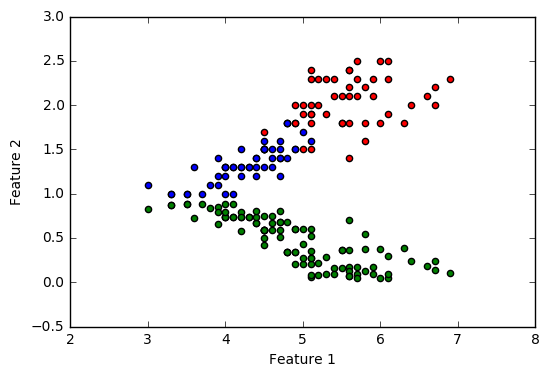

In [12]:
plt.scatter(X1,probabilities,c='g')
plt.scatter(class0_feature1,class0_feature2,c='r')
plt.scatter(class1_feature1,class1_feature2,c='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [13]:

def predict_y(X,thetas):
    hyp = X.dot(thetas)
    probabilities = (1/(1+math.e**-hyp))
    y_predict = np.zeros(np.shape(probabilities))
    for i in range(len(y_predict)):
        if probabilities[i] < 0.5:
            y_predict[i] = 0
        else:
            y_predict[i] = 1
    return y_predict
y_predictions = predict_y(X_b,thetas_best)


In [14]:
def evaluate_regression(X,labels,eta=learning_rates[1],cost_thresh=thresholds[1]):
    thetas = gradient_descent(X,labels,eta=eta,cost_thresh=cost_thresh)
    predictions = predict_y(X, thetas)
    m = len(predictions)
    true_positives = 0
    false_positives = 0
    for prediction in range(len(predictions)):
        if predictions[prediction] == labels[prediction]:
            true_positives += 1
        else:
            false_positives += 1
    accuracy = true_positives/m
    false_pos_rate = false_positives/m
    print('Accuracy:',accuracy)
    print('False positives:',false_pos_rate)
    return accuracy
evaluate_regression(X_b, y,eta=learning_rates[1],cost_thresh=thresholds[2])

Learning rate: 0.01
Cost threshold: 1e-07
Number of iterations: 259266
Final cost: 0.128208591709
Final change_cost 9.99994870798e-08
Accuracy: 0.93
False positives: 0.07


0.93

In [15]:
gradient_descent(X_b, y, graph=True eta=learning_rates[0],cost_thresh=thresholds[2])

SyntaxError: invalid syntax (<ipython-input-15-40a1e5ac5e18>, line 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_b, y)

In [ ]:
log_reg.coef_



y = 2.74 - 0.345x1 - 2.358x2

In [ ]:
log_reg.score(X_b,y)